<h2>Group 7:</h2>

Mingzhe Shi - 1665073

Ruichen Hu - 1674544

Siming Sun - 1692933

Yasen Gao - 1723294

<h2>Workload:</h2>

All team members tried to solve the problems individually, the answers of those problems will be discussed in the group meeting.

# Question 1

In [1]:
# Question 1
import numpy as np

a = np.array([[0.27, -0.4, 0.32], [0.31, 0.37, -0.61], [0.15, 0.05, -0.39]], dtype = np.float64)
print(a)
print()

# average feature values(column)
print(np.sum(a, axis = 0)/3)
print(np.mean(a, axis = 0))
# average feature values(row)
print(np.sum(a, axis = 1)/3)
print(np.mean(a, axis = 1)) 
import scipy
# from scipy import linalg
#rows are orthogonal --> multipulation of each pair of rows is 0
print("The multipulation of each pair of rows:")
print(a[0].T @ a[1])
print(a[0].T @ a[2])
print(a[1].T @ a[2])
#rows are orthonormal --> multipulation of each pair of rows is 0(orthogonal) + norm of each rwo vector is 1
print("The norm of each row vector:")
for i in range(0, 3):
    print(np.linalg.norm(a[i], ord=2))

[[ 0.27 -0.4   0.32]
 [ 0.31  0.37 -0.61]
 [ 0.15  0.05 -0.39]]

[ 0.24333333  0.00666667 -0.22666667]
[ 0.24333333  0.00666667 -0.22666667]
[ 0.06333333  0.02333333 -0.06333333]
[ 0.06333333  0.02333333 -0.06333333]
The multipulation of each pair of rows:
-0.2595
-0.1043
0.3029
The norm of each row vector:
0.579050947672137
0.7778817390837761
0.4208325082500163


# Question 2

In [2]:
def fun(a, b):
    return a**4 + 4*a + 2 * b + (b**4) / 2

def fv1_x(x, y):
    return (4.0 * x ** 3 + 4.0)

def fv1_y(x, y):
    return (2.0 + 2.0 * y **3)

def gradientDescent(x, y, size, threshold, maxCount):
    count = 0
    gd_0 = fv1_x(x, y)
    gd_1 = fv1_y(x, y)
    isBreak = False
    while(((abs(gd_0) >= threshold) and (abs(gd_1) >= threshold))):
        count += 1
        x -= size * gd_0
        y -= size * gd_1
        try:
            gd_0 = fv1_x(x, y)
            gd_1 = fv1_y(x, y)
        except OverflowError:
            print("No convergence due to too large")
            isBreak = True
            break
        if(count >= maxCount):
            print("no convergence within " + str(maxCount) + " iterations")
            return np.array([])
    if isBreak == False:
        print("Gradient descent converges to the minimum in " + str(count) + " iterations")
    return isBreak, np.array([[x], [y]])

print("A:")
x = 1
y = 1
size = 1
threshold = 1e-5
maxCount = 10
isBreak, res = gradientDescent(x, y, size, threshold, maxCount)
if res.size != 0 and isBreak == False:
    print("The final coordinates are:")
    print(res)



print()

print("B:")
x = 2
y = 1
size = 0.1
threshold = 1e-5
maxCount = 20
isBreak, res = gradientDescent(x, y, size, threshold, maxCount)
if res.size != 0 and isBreak == False:
    print("The final coordinates are:")
    print(res)


print()

print("C:")
print("start from (1, 1) with step size = 0.01:")
x = 1
y = 1
size = 0.1
threshold = 1e-5
maxCount = 20
isBreak, res = gradientDescent(x, y, size, threshold, maxCount)
if res.size != 0 and isBreak == False:
    print("The final coordinates are:")
    print(res)
print("start from (5, 5) with step size = 1:")
x = 5
y = 5
size = 1
threshold = 1e-5
maxCount = 12
isBreak, res = gradientDescent(x, y, size, threshold, maxCount)
if res.size != 0 and isBreak == False:
    print("The final coordinates are:")
    print(res)

print()

A:
No convergence due to too large

B:
Gradient descent converges to the minimum in 11 iterations
The final coordinates are:
[[-1.00000024]
 [-0.97704834]]

C:
start from (1, 1) with step size = 0.01:
Gradient descent converges to the minimum in 11 iterations
The final coordinates are:
[[-1.00000057]
 [-0.97704834]]
start from (5, 5) with step size = 1:
No convergence due to too large



# Question 3

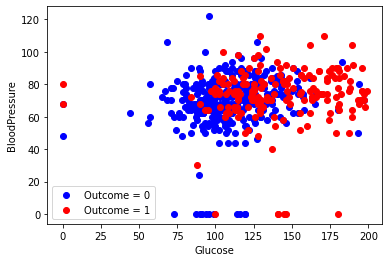

k = 1: 0.6850393700787402
k = 2: 0.7086614173228346
k = 3: 0.6968503937007874
k = 4: 0.7322834645669292


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def euclidean(train, test):
    # dist = numpy.linalg.norm(train - test)
    # for x in range(2):
    #     distance += pow((point1[x] - point2[x]), 2)
    # return math.sqrt(distance)
    dist = np.sqrt(np.sum((train - test) ** 2))
    return dist


def k_nearest(x_train, comp, k):
    point_dist = []
    for j in range(len(x_train)):
        distances = euclidean(np.array(x_train[j, :]), comp)
        point_dist.append(distances)
    point_dist = np.array(point_dist)
    # k nearest
    dist = np.argsort(point_dist)[:k]
    return dist


def my_knn(x_train, y_train, x_test, k):
    y_pred = []
    for item in x_test:
        k_neighbor = k_nearest(x_train, item, k)
        labels = y_train[k_neighbor]
        ones = 0
        zeros = 0
        for j in labels:
            if j == 1:
                ones += 1
            else:
                zeros += 1
        y_pred.append(int(ones > zeros))
    return y_pred

def score(x, y):
    count = 0
    for i in range(len(y)):
        if x[i] == y[i]:
            count += 1
    return count/len(y)

train_data = pd.read_csv("data/diabetes_train_data.csv")
test_data = pd.read_csv("data/diabetes_validate_data.csv")

#plot the data
X_true = train_data[train_data.Outcome == 1.0].values
X_false = train_data[train_data.Outcome == 0.0].values

plt.scatter(X_false[:, 0], X_false[:, 1], color = 'blue', marker = 'o', label = 'Outcome = 0')
plt.scatter(X_true[:, 0], X_true[:, 1], color = 'red', marker = 'o', label = 'Outcome = 1')
plt.xlabel(train_data.columns[0])
plt.ylabel(train_data.columns[1])
plt.legend(loc = 'lower left')
plt.show()

X_train = train_data.iloc[:, [0, 1]].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, [0, 1]].values
y_test = test_data.iloc[:, -1].values

pred = my_knn(X_train, y_train, X_test, 1)
print("k = 1: "+ str(score(pred, y_test)))
pred = my_knn(X_train, y_train, X_test, 2)
print("k = 2: "+ str(score(pred, y_test)))
pred = my_knn(X_train, y_train, X_test, 3)
print("k = 3: "+ str(score(pred, y_test)))
pred = my_knn(X_train, y_train, X_test, 4)
print("k = 4: "+ str(score(pred, y_test)))

# Question 4

In [4]:
import numpy as np

test = np.array([(2, 1.5, 0),
                 (-2, 0, 1),
                 (3, 2.5, 0),
                 (3, 3.5, 0),
                 (-2, 3, 1),
                 (2, 3, 0),
                 (-2, 1, 1),
                 (-1.5, 1, 1)])

shape = test.shape
# print(shape)
x2 = np.ones((shape[0], 1), dtype=float)
x1 = test[:, [0, 1]]
X = np.append(x1, x2, axis=1)

classifer = np.array([-0.078, -0.227, 0.165])
y = np.dot(X, np.transpose(classifer))
y_pred = np.where(y > 0, 1, 0)
y_act = np.transpose(test[:, [-1]]).reshape(y_pred.shape)

print('prediction: ' + str(y_pred))
# print(y_act)

actualOne = 0
actualZero = 0
actualZeroPredOne = 0
actualOnePredZero = 0

for i in range(y_pred.shape[0]):
    if y_pred[i] == y_act[i]:
        if y_pred[i] == 1:
            actualOne += 1
        else:
            actualZero += 1
    else:
        if y_pred[i] == 1:
            actualZeroPredOne += 1
        else:
            actualOnePredZero += 1

cm = np.array([(actualZero, actualZeroPredOne), (actualOnePredZero, actualOne)])
print('confusion matrix:')
print(cm)



prediction: [0 1 0 0 0 0 1 1]
confusion matrix:
[[4 0]
 [1 3]]


# Question 5

In [5]:
import numpy as np
import pandas as pd
from collections import defaultdict
from pip._internal.req.req_file import preprocess
heart_train_data = "data/heart_train_data.csv"
heart_validate_data = "data/heart_validate_data.csv"


class NBClassifier(object):
    def __init__(self):
        self.y = []
        self.x = []
        self.py = defaultdict(float) 
        self.pxy = defaultdict(dict) 

    def prob(self, element, arr):
        # cal the frequency of each element
        prob = 0.0
        for a in arr:
            if element == a:
                prob += 1 / len(arr)
        if prob == 0.0:
            prob = 0.001
        return prob

    def get_set(self, x, y):
        self.y = list(set(y))
        for i in range(x.shape[1]):
            self.x.append(list(set(x[:, i])))

    def fit(self, x, y):
        # fit the train set
        self.get_set(x, y)
        # 1. compute p(y)
        for yi in self.y:
            self.py[yi] = self.prob(yi, y)
        print("p(y)" + str(self.py))
        # 2. compute p(x|y)
        #print(x.shape[1])
        for yi in self.y:
            for i in range(x.shape[1]):
                sample = x[y == yi, i]
                pxy = [self.prob(xi, sample) for xi in self.x[i]]
                # print("yi: " + str(yi) + "   i:" + str(i))
                # print("pxy" + str(pxy))
                self.pxy[yi][i] = pxy
        print("p(x|y)" + str(self.pxy))

    def predict_one(self, x):
        max_prob = 0.0
        max_yi = self.y[0]
        for yi in self.y:
            prob_y = self.py[yi]
            for i in range(len(x)):
                prob_x_y = self.pxy[yi][i][self.x[i].index(x[i])]  # p(xi|y)
                prob_y *= prob_x_y  # p(x1|y)p(x2|y)...p(xn|y)p(y)
            if prob_y > max_prob:
                max_prob = prob_y
                max_yi = yi
        return max_yi

    def predict(self, samples):
        y_list = []
        for m in range(samples.shape[0]):
            yi = self.predict_one(samples[m, :])
            y_list.append(yi)
        return np.array(y_list)

    def score(self, x, y):
        y_test = self.predict(x)
        score = 0.0
        for i in range(len(y)):
            if y_test[i] == y[i]:
                score += 1 / len(y)
        # print(y_test)
        return score


if __name__ == "__main__":
    train_data = pd.read_csv(heart_train_data)
    test_data = pd.read_csv(heart_validate_data)
    # print(data)
    X_train = train_data.iloc[:, [0, 1, 2]].values
    y_train = train_data.iloc[:, -1].values
    X_test = test_data.iloc[:, [0, 1, 2]].values
    y_test = test_data.iloc[:, -1].values

    clf = NBClassifier()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print("accuracy: " + str(accuracy))


p(y)defaultdict(<class 'float'>, {0: 0.4428571428571424, 1: 0.5571428571428563})
p(x|y)defaultdict(<class 'dict'>, {0: {0: [0.8279569892473113, 0.043010752688172046, 0.0860215053763441, 0.043010752688172046], 1: [0.4301075268817202, 0.5698924731182793], 2: [0.07526881720430109, 0.2903225806451612, 0.6344086021505373]}, 1: {0: [0.2051282051282051, 0.26495726495726496, 0.42735042735042783, 0.10256410256410255], 1: [0.8717948717948711, 0.1282051282051282], 2: [0.025641025641025644, 0.8290598290598286, 0.14529914529914528]}})
accuracy: 0.7472527472527466


# Question 6

In [6]:
import numpy as np
import pandas as pd

def entropy(data):
    e = 0
    if len(data) != 0:
        # ratio of no disease
        py_1 = sum(data["target"]) / len(data)
        # ratio of disease
        py_0 = 1 - py_1
        if py_0 == 0:
            e = -(py_1 * np.log2(py_1))
        elif py_1 == 0:
            e = -(py_0 * np.log2(py_0))
        else:
            e = -(py_1 * np.log2(py_1) + py_0 * np.log2(py_0))
    return e


def cost(data, feature):
    total_num = len(data[feature])
    count_features = {}
    costs = {}
    for key in data[feature]:
        if key in count_features.keys():
            count_features[key] += 1
        else:
            count_features[key] = 1
    for key in count_features:
        # one VS all: we can assume the left == key and right != key
        left = data.loc[data[feature].eq(key)]
        right = data.loc[~data[feature].eq(key)]
        le = entropy(left)
        re = entropy(right)
        ln = len(left) / total_num
        rn = 1 - len(left) / total_num
        e = entropy(data)   
        e = ln * le + rn * re - entropy(data)
        costs[key] = e
        # costs[key] = (sum(left['target']) / total_num) * entropy(left)
        # +(1 - (sum(left['target']) / total_num)) * entropy(right) - entropy(data)
    costs = dict(sorted(costs.items(), key=lambda item: item[1]))
    
    if(len(costs)!=0):
        purest_feature = list(costs.keys())[0]
        purest_cost = costs[purest_feature]
        return purest_cost, purest_feature
    # if no data in the group, which should not happen
    else:
        return 'NULL', 'NULL'


def train_path(data):
    features = list(data.columns[:3])
    all_path = {}

    def train(sub_data, sub_features, label, path, depth):
        if len(sub_features) == 0 or depth == 3:
            # print(label, "-----------------------------")
            # print(sub_data)
            healthy_counts = sum(sub_data["target"])
            counts = len(sub_data["target"])
            health = 0
            if counts != 0:
                if healthy_counts > (counts / 2):
                    health = 1
                    accuracy = max(healthy_counts, counts - healthy_counts) / counts
                    #print("accuracy：", accuracy)
            #else:
                #print("this label has no train data ")
            print("leaf entropy: " + str(entropy(sub_data)))
            path.append(health)
            all_path[label] = path
            return
        costs = {}
        fes = {}
        for feature in sub_features:
            co, fe = cost(sub_data, feature)
            if co != 0:
                costs[feature] = co
                fes[feature] = fe
        selected_fe = min(costs, key=costs.get)
        left_path = path.copy()
        right_path = path.copy()
        left_path.append([selected_fe, fes[selected_fe], True])
        right_path.append([selected_fe, fes[selected_fe], False])

        left = sub_data.loc[sub_data[selected_fe] == fes[selected_fe]]
        right = sub_data.loc[sub_data[selected_fe] != fes[selected_fe]]

        train(left.copy(), sub_features, 2 * label, left_path, depth + 1)
        train(right.copy(), sub_features, 2 * label + 1, right_path, depth + 1)

    train(data, features, 0, [], 0)
    return all_path


def predict(x_test, paths):
    for path in paths:
        for i in range(3):
            if paths[path][i][0] == 'thal':
                paths[path][i][0] = 2
            if paths[path][i][0] == 'exang':
                paths[path][i][0] = 1
            if paths[path][i][0] == 'cp':
                paths[path][i][0] = 0
    y_list = []
    results = []
    for i in range(8):
        results.append(paths[i][3])
    p = paths
    for m in range(x_test.shape[0]):
        feature = paths[1][0][0]
        value = paths[0][0][1]
        if x_test[m, :][paths[0][0][0]] == paths[0][0][1]:
            if x_test[m, :][paths[0][1][0]] == paths[0][1][1]:
                if x_test[m, :][paths[0][2][0]] == paths[0][2][1]:
                    p = results[0]
                else:
                    p = results[1]
            else:
                if x_test[m, :][paths[2][2][0]] == paths[2][2][1]:
                    p = results[2]
                else:
                    p = results[3]
        else:
            if x_test[m, :][paths[4][1][0]] == paths[4][1][1]:
                if x_test[m, :][paths[4][2][0]] == paths[4][2][1]:
                    p = results[4]
                else:
                    p = results[5]
            else:
                if x_test[m, :][paths[6][2][0]] == paths[6][1][1]:
                    p = results[6]
                else:
                    p = results[7]
        y_list.append(p)
    return y_list


def score(x, y, paths):
    y_test = predict(x, paths)
    score = 0.0
    for i in range(len(y)):
        if y_test[i] == y[i]:
            score += 1 / len(y)
    return score

train_data = pd.read_csv("data/heart_train_data.csv")
test_data = pd.read_csv("data/heart_validate_data.csv")
X_test = test_data.iloc[:, [0, 1, 2]].values
y_test = test_data.iloc[:, -1].values

paths = train_path(train_data)
print("Below represent the 8 different paths of leaves:")
for path in paths:
    print(paths[path])
accuracy = score(X_test, y_test, paths)
print("accuracy: " + str(accuracy))

leaf entropy: 0.7219280948873623
leaf entropy: 0.9321115676166747
leaf entropy: 0.6840384356390418
leaf entropy: 0.2811937964320427
leaf entropy: 0.9494520153879484
leaf entropy: 0.9182958340544896
leaf entropy: 0.7642045065086203
leaf entropy: 0.34351974100740124
Below represent the 8 different paths of leaves:
[['cp', 0, True], ['thal', 2, True], ['exang', 1, True], 0]
[['cp', 0, True], ['thal', 2, True], ['exang', 1, False], 1]
[['cp', 0, True], ['thal', 2, False], ['exang', 0, True], 0]
[['cp', 0, True], ['thal', 2, False], ['exang', 0, False], 0]
[['cp', 0, False], ['thal', 3, True], ['exang', 0, True], 1]
[['cp', 0, False], ['thal', 3, True], ['exang', 0, False], 0]
[['cp', 0, False], ['thal', 3, False], ['cp', 3, True], 1]
[['cp', 0, False], ['thal', 3, False], ['cp', 3, False], 1]
accuracy: 0.7252747252747247


The decision tree implemented above can be visualized in the following graph:

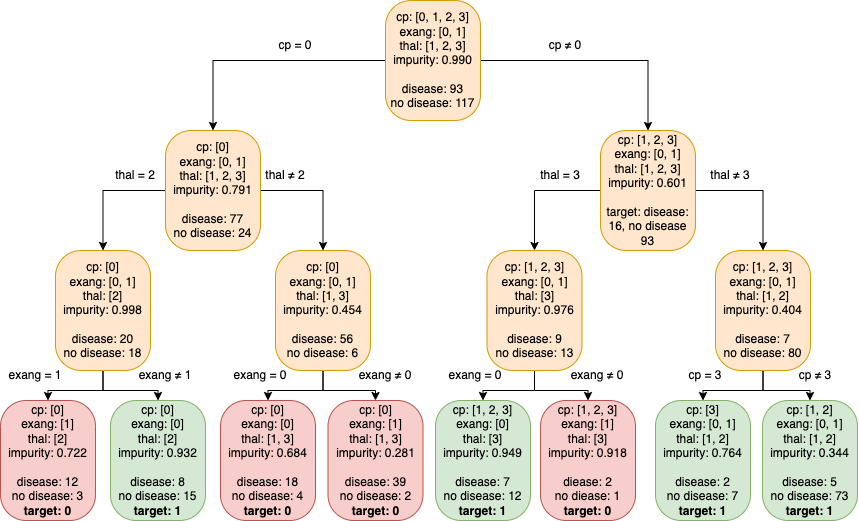

# Exercise 7: Support Vector Machines
In this exercise, we used scikit-learn to compare the performance of three SVM kernels on a toy dataset. Besides, we explored the correlation between hyperparameter and classification behavior of the SVM.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

## Part A

### Data

In this part we classified data through three SVM kernels: linear, polynomial and RBF kernal. First, we imported the data, which is visualized in a scatter plot.


           x1        x2    y
0   -0.397537  0.123492  1.0
1    0.388624  1.417034  0.0
2    0.493635 -0.502826  1.0
3   -0.266391 -0.631363  1.0
4   -1.478465  0.137630  0.0
..        ...       ...  ...
295  0.637858 -0.726837  0.0
296 -0.644197  0.056053  1.0
297 -0.664777  0.063750  1.0
298  0.629149 -0.262013  0.0
299 -0.783846 -0.098012  1.0

[300 rows x 3 columns]


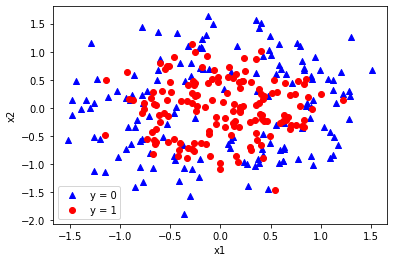

In [8]:
file = "data/toy_dataset.csv"
data = pd.read_csv(file)

## Visualize the data to explore it
print(data)

X_true = data[data.y == 1.0].values
X_false = data[data.y == 0.0].values

plt.scatter(X_false[:, 0], X_false[:, 1], color = 'blue', marker = '^', label = 'y = 0')
plt.scatter(X_true[:, 0], X_true[:, 1], color = 'red', marker = 'o', label = 'y = 1')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend(loc = 'lower left')
plt.show()

In [9]:
## Helper function to plot the decision boundary of a classifier. 
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF
  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr,
              edgecolors='k')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

In [10]:
# Helper function to visualize the results of a grid search with the two hyperparameters of rbf kernel as a heatmap
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

### Compare SVM Kernels


To compare different types of SVMs, we plotted the decision boundary of each kernel. Based on the following three plots, we can find that the RBF kernel has the best performance on this toy dataset.

In each plot, there are two kinds of dots, each of which represents a class. The horizontal and vertical ordinate corresponds to a feature respectively.

From the plots, we can infer that dataset is not linearly separable. Therefore, the linear SVM is not capable of separating different classes in a good manner and thus, underfit the data. Similarly, the polynomial SVM does not perform well on the classification. The underfiting may be resulted from the insufficient degree, as we used the default parameters of the *svm.SVC* function, and for polynomial SVM the default degree is three.

Compared to the above SVMs, the RBF SVM reveals a better classification. It is obvious that the majority of the red and blue dots are seperated by a circular boundary, which is generated by the SVM.

In [11]:
##ToDo
#Fit different kernels 
data=np.array(data)

#Fit with svm linear kernels
clf = svm.SVC(kernel='linear')
clf.fit(data[:,:2],data[:,2])


#Fit with svm polynomial kernels
clf2 = svm.SVC(kernel='poly')
clf2.fit(data[:,:2],data[:,2])


#Fit with svm RBF kernels
clf3 = svm.SVC(kernel='rbf')
clf3.fit(data[:,:2],data[:,2])


SVC()

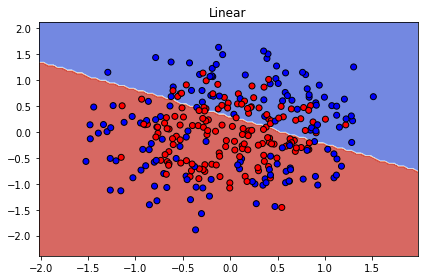

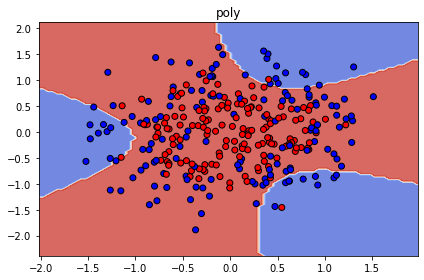

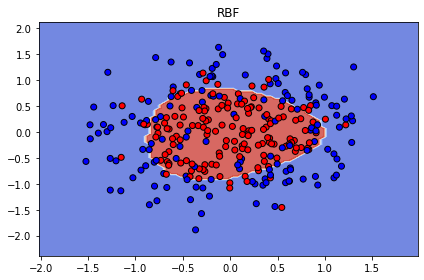

In [12]:
#Plot the decision boundary
plot_decision_svm(data[:,:2],data[:,2],clf,'Linear')
plot_decision_svm(data[:,:2],data[:,2],clf2,'poly')
plot_decision_svm(data[:,:2],data[:,2],clf3,'RBF')


## Part B

### Optimize rbf Kernel
 

In this part, we used *GridSearchCV* function combined with 3-fold-cross validation to figure out the most suitable values of parameters(C and gamma) for RBF SVM. The values of the parameters are picked out from arraies given in the assignment file. The results are visualized in a heatmap.



In [13]:
parameters = {'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2],'C': [1e-2, 1e-1, 1, 2, 5, 10]}
clf4 = GridSearchCV(svm.SVC(kernel='rbf'), parameters, cv = 3)
clf4.fit(data[:,:2],data[:,2])

print("\nThe best estimator is", clf4.best_estimator_)

print("\nThe best paramator is", clf4.best_params_)

print("\nThe best score is", clf4.best_score_)


The best estimator is SVC(C=2, gamma=1)

The best paramator is {'C': 2, 'gamma': 1}

The best score is 0.7533333333333334


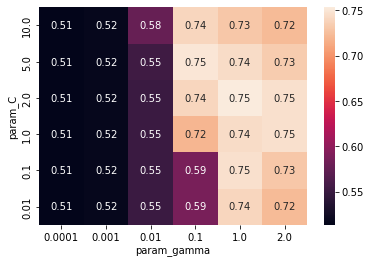

In [14]:
## generate the heatmap
heatmap(clf4)

The best model is generated with the parameter C = 2 and gamma = 1. As shown above, the accuracy of this model can be derived from the *best score*, which is 0.7533333333333334.

The numbers and colors in the heatmap show how the SVM behaves on the dataset. The higher the number is, the better the SVM distinguish different classes. Therefore, the best model is the pair (c = 2, gamma = 0.75), which is presented with the highest index(0.75) and lightest color. In comparison with that, the darkest blocks appear in the heatmap when gamma is small . The numbers decrease as the value of gamma reduce from 0.01 to 0.0001, and this tendency is not dependent on what value for C is chosen. That means, in the range of 0.0001 to 0.01, gamma has significantly greater impact on the performance of the RBF SVM than the parameter C.

In terms of underfitting and overfitting, as we know that parameter C add penalty to the SVM. The higer value this parameter has, the more likely an overfitting model to be obtained. However, in the heatmap, the overfitting anf underfitting is not illustrated explictly, bacause when gamma is small, there is no difference whether C is set to be large or small.




Therefore, we made some plots based on different combinations of parameter values. They help us further explore the impacts of hypermeters on overfitting and underfitting.

- **Series I**: varied C and fixed gamma

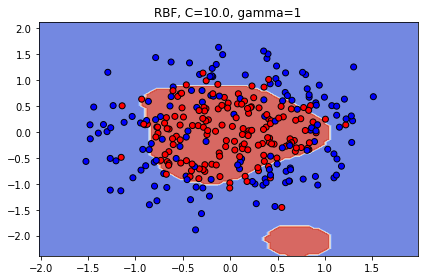

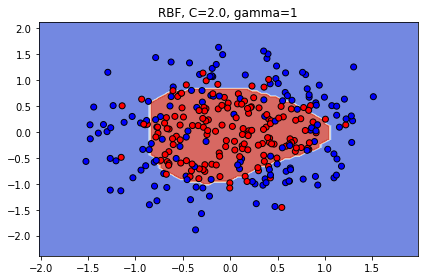

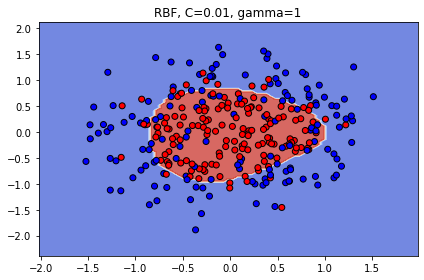

In [15]:
X = np.array(data[0 : data.shape[0], 0 : 2])
y = np.array(data[0 : data.shape[0], 2 : 3]).ravel()

clf_rbf7 = svm.SVC(kernel='rbf', C=10.0, gamma=1).fit(X, y)
plot_decision_svm(X, y, clf_rbf7, "RBF, C=10.0, gamma=1")

clf_rbf8 = svm.SVC(kernel='rbf', C=5, gamma=1).fit(X, y)
plot_decision_svm(X, y, clf_rbf8, "RBF, C=2.0, gamma=1")

clf_rbf9 = svm.SVC(kernel='rbf', C=2, gamma=1).fit(X, y)
plot_decision_svm(X, y, clf_rbf9, "RBF, C=0.01, gamma=1")



From the plots we find that when C = 10 and gamma = 1, the model is overfitting. This bad performance is improved when C decreases continuously.
This phenomenon matchs what we mentioned above that SVM would show a overfitting tendency when C increases.

- **Series II**: fixed C = 2.0 and varied gamma

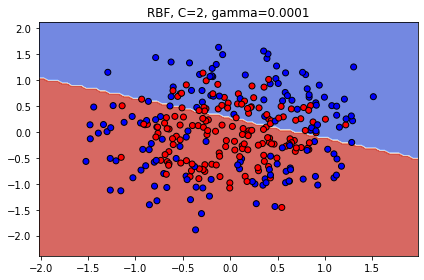

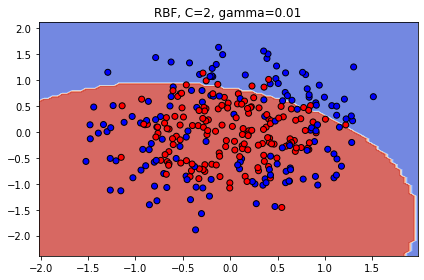

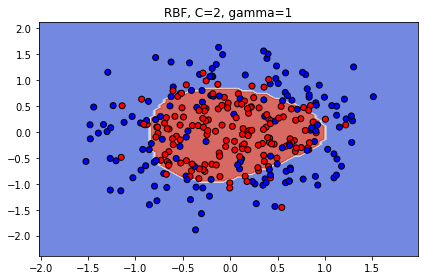

In [16]:
X = np.array(data[0 : data.shape[0], 0 : 2])
y = np.array(data[0 : data.shape[0], 2 : 3]).ravel()

clf_rbf1 = svm.SVC(kernel='rbf', C=2.0, gamma=0.0001).fit(X, y)
plot_decision_svm(X, y, clf_rbf1, "RBF, C=2, gamma=0.0001")

clf_rbf2 = svm.SVC(kernel='rbf', C=2.0, gamma=0.01).fit(X, y)
plot_decision_svm(X, y, clf_rbf2, "RBF, C=2, gamma=0.01")

clf_rbf3 = svm.SVC(kernel='rbf', C=2, gamma=1).fit(X, y)
plot_decision_svm(X, y, clf_rbf3, "RBF, C=2, gamma=1")


The three plots show the behavior of underfitting SVMs with the parameter pair (C = 2, gamma = 0.0001) and (C = 2, gamma = 0.001). Thus, we can conclude that the smaller the gamma is, the more likely the SVM is to underfit. 

- **Series III**: fixed C = 10.0 and varied gamma

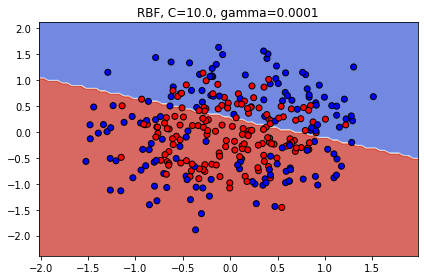

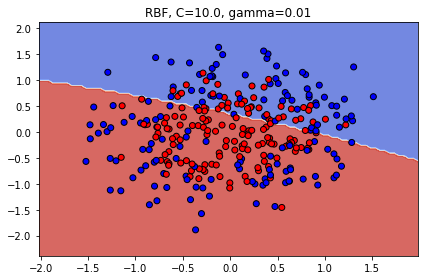

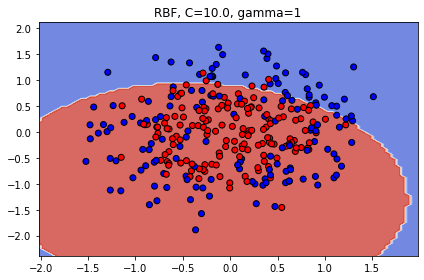

In [17]:
clf_rbf4 = svm.SVC(kernel='rbf', C=10.0, gamma=0.0001).fit(X, y)
plot_decision_svm(X, y, clf_rbf4, "RBF, C=10.0, gamma=0.0001")

clf_rbf5 = svm.SVC(kernel='rbf', C=10.0, gamma=0.001).fit(X, y)
plot_decision_svm(X, y, clf_rbf5, "RBF, C=10.0, gamma=0.01")

clf_rbf6 = svm.SVC(kernel='rbf', C=10, gamma=0.01).fit(X, y)
plot_decision_svm(X, y, clf_rbf6, "RBF, C=10.0, gamma=1")

Compared to Series II, we increased C to 10.0 and kept it unchanged in Series III. Then, we can find that although C is large enough, there is no overfitting model. In contrast, all three plots indicate an underfitting behavior of SVM. This is because gamma is small enough that the impacts derived from a large C is neutralized, or rather is overtaken. This validates our conclusion that gamma has more influences than C within the given range that the parameters can be choosen.